In [2]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [1]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#get stock price
df = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2020-04-25')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.505024
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.669640
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.149662
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.069202
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.756794
...,...,...,...,...,...,...
2020-04-20,70.419998,69.212502,69.487503,69.232498,130015200.0,68.699974
2020-04-21,69.312500,66.357498,69.070000,67.092499,180991600.0,66.576424
2020-04-22,69.474998,68.050003,68.402496,69.025002,117057200.0,68.494064


In [3]:
df.shape

(331, 6)

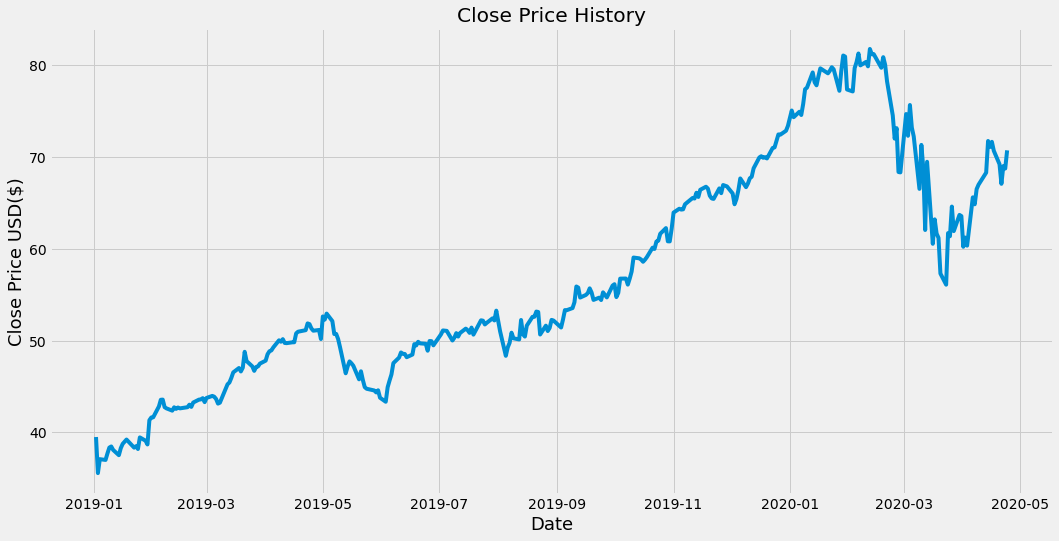

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [5]:
#create df with just close price
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#get number of rows to train model
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

265

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data 

In [7]:
#Create training data set

#create scaled training data set
train_data = scaled_data[0:training_data_len , :]

#split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.0850224 , 0.        , 0.03280899, 0.0310253 , 0.04626775,
       0.06010483, 0.06275336, 0.05459159, 0.04221392, 0.05880766,
       0.06891519, 0.07388788, 0.07907683, 0.06005081, 0.06340195,
       0.05680771, 0.08415757, 0.07626615, 0.06750981, 0.12464189,
       0.13107399, 0.13150641, 0.15707257, 0.17290951, 0.17323389,
       0.155397  , 0.15253229, 0.14723522, 0.15512673, 0.15128906,
       0.15464028, 0.15258632, 0.15534289, 0.16128855, 0.15604558,
       0.16636937, 0.17317978, 0.17372033, 0.17663905, 0.16734225,
       0.1771796 , 0.18193612, 0.18020645, 0.17474731, 0.16382896,
       0.16604508, 0.19842165, 0.20928598, 0.21361009, 0.22452836,
       0.23744657, 0.24771634, 0.23966269, 0.24847305, 0.28593044,
       0.26409382, 0.25160802, 0.24106799, 0.25014862, 0.2514999 ])]
[0.2581481648876156]



In [8]:
#convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape


(205, 60, 1)

In [10]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

205/205 [==============================] - 13s 36ms/step - loss: 0.0179


In [13]:
#Create testing dataset
test_data = scaled_data[training_data_len - 60:, :]
#Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get predicted prices valuse
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

3.1473461497913706

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


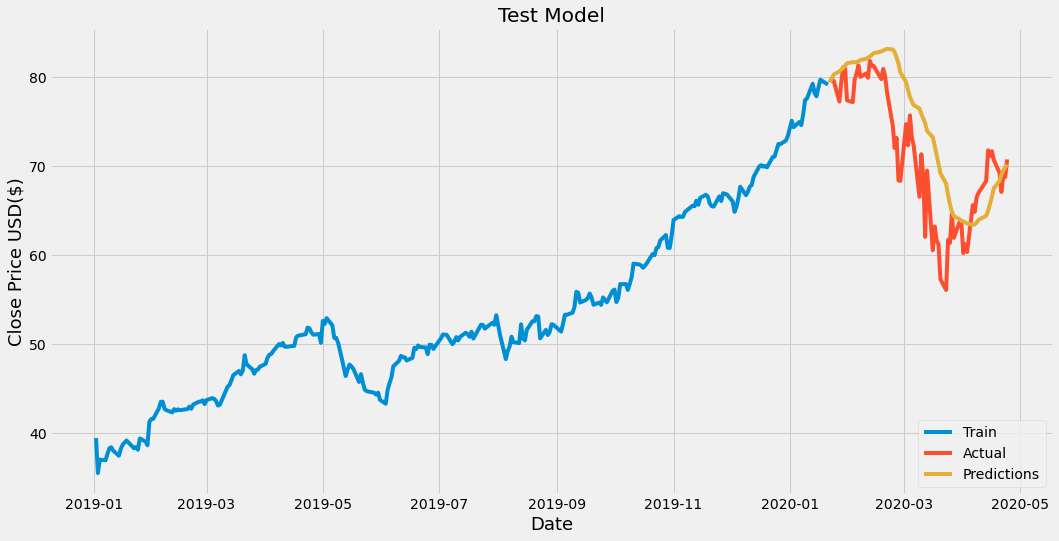

In [22]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

 #Visualization
plt.figure(figsize=(16,8))
plt.title('Test Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#see valid predicted prices
valid[58:70]

,Close,Predictions
Date,,
2020-04-15,71.107498,65.735687
2020-04-16,71.672501,66.590828
2020-04-17,70.699997,67.492813
2020-04-20,69.232498,68.340248
2020-04-21,67.092499,69.042183
2020-04-22,69.025002,69.510109
2020-04-23,68.757500,69.883240
2020-04-24,70.742500,70.160080


In [20]:
#get quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2021-04-21')

new_df= apple_quote.filter(['Close'])
#Check last 60 days
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert X_test data set to numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[130.71426]]


In [21]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-04-22', end='2021-04-22')

print(apple_quote2['Close'])

Date
2021-04-22    131.940002
Name: Close, dtype: float64
